In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA

In [153]:
df = pd.read_excel('2019_Data_Professionnelle_Salaires.xlsx')

In [3]:
df.head()

,Année de l'enquete,Horodatage,Salaire,Pays,Code postal,Origine base de donnée,NbreAnnéesAvecCetteBase de données,autres Databases,Nature Emploi,Libellé d'emploi,Management,Ancienneté,nbre d'entreprise dans le passé,nbre de personne dans l'équipe,Diplôme,Certifications,Heures de travail par semaine,Secteur d'activité,Genre/Sexe
0,2017,2017-01-05 05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Masters,"Yes, and they're currently valid",45,Private business,Not Asked
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,None (no degree completed),"No, I never have",35,Private business,Not Asked
2,2017,2017-01-05 05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Masters,"Yes, but they expired",45,Private business,Not Asked
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,No,2,Not Asked,None,Associates (2 years),"No, I never have",40,Private business,Not Asked
4,2017,2017-01-05 05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,No,10,Not Asked,None,Bachelors (4 years),"Yes, but they expired",40,Private business,Not Asked


# Overview 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 19 columns):
Année de l'enquete                    6893 non-null int64
Horodatage                            6893 non-null datetime64[ns]
Salaire                               6893 non-null object
Pays                                  6893 non-null object
Code postal                           5934 non-null object
Origine base de donnée                6893 non-null object
NbreAnnéesAvecCetteBase de données    6893 non-null int64
autres Databases                      5520 non-null object
Nature Emploi                         6893 non-null object
Libellé d'emploi                      6893 non-null object
Management                            6893 non-null object
Ancienneté                            6893 non-null int64
nbre d'entreprise dans le passé       6893 non-null object
nbre de personne dans l'équipe        6893 non-null object
Diplôme                               6893 non-null object
Cer

In [82]:
df.isna().sum()

Année de l'enquete                       0
Horodatage                               0
Salaire                                  0
Pays                                     0
Code postal                            959
Origine base de donnée                   0
NbreAnnéesAvecCetteBase de données       0
autres Databases                      1373
Nature Emploi                            0
Libellé d'emploi                         0
Management                               0
Ancienneté                               0
nbre d'entreprise dans le passé          0
nbre de personne dans l'équipe           0
Diplôme                                  0
Certifications                           0
Heures de travail par semaine            0
Secteur d'activité                       0
Genre/Sexe                               0
dtype: int64

In [151]:
df.describe(include=object)

,annee_de_l_enquete,pays,code_postal,origine_base_de_donnee,autres_databases,nature_emploi,libelle_d_emploi,management,nbre_d_entreprise_dans_le_passe,nbre_de_personne_dans_l_equipe,diplome,certifications,secteur_d_activite,genre_sexe
count,4650,4650,4650,4650,4650,4650,4650,4650,4650,4650,4650,4650,4650,4650
unique,3,63,1917,15,1191,3,20,2,7,7,5,3,7,3
top,2017,United States,Not Asked,Microsoft SQL Server,Microsoft SQL Server,Full time employee,DBA,No,Not Asked,None,Bachelors (4 years),"No, I never have",Private business,Not Asked
freq,2227,3371,2227,4324,458,4152,2368,3525,4093,1839,2457,2229,3854,2260


In [6]:
df.describe().round()

,Année de l'enquete,NbreAnnéesAvecCetteBase de données,Ancienneté,Heures de travail par semaine
count,6893.0,6893.0,6893.0,6893.0
mean,2018.0,25.0,7.0,43.0
std,1.0,745.0,6.0,7.0
min,2017.0,0.0,0.0,3.0
25%,2017.0,6.0,3.0,40.0
50%,2018.0,10.0,5.0,40.0
75%,2018.0,15.0,10.0,45.0
max,2019.0,53716.0,40.0,200.0


# Preprocessing

In [154]:
# correction des titres de colonnes

df.columns = (df.columns.str.strip().str.lower()
              .str.replace(' ', '_')
              .str.replace('é', 'e')
              .str.replace("'", '_')
             .str.replace("/", '_')
             .str.replace("ô", 'o'))
df.rename(columns={"nbreanneesaveccettebase_de_donnees":"nbr_annee_avec_db"},inplace=True)

In [155]:
# added index col
df['index_col'] = df.index
_ = df['index_col'].astype(int,inplace=True)

In [156]:
# Salary values cleaning
df = df.astype({"salaire": str})
df["salaire"] = df["salaire"].map(lambda x: str.strip(x).replace(".","").replace(" ","").replace(",",""))
df = df.astype({"salaire": int})

In [157]:
# cast to string
df = df.astype({"annee_de_l_enquete": str})

In [158]:
def gen_rep(x):
    if x not in ["Male","Female","Not Asked"]:
        return "Not Asked"
    return x

# replace gender values
df.genre_sexe = df.genre_sexe.apply(gen_rep)

In [159]:
# removed part time Employees 
df = df.where((df.nature_emploi != 'Part time' )).dropna()

In [160]:
# remove redundant value
df.nature_emploi = df.nature_emploi.replace("Independent or freelancer or company owner",\
                                            'Independent consultant, contractor, freelancer,  or company owner')

In [161]:
# remove redundant value
df.libelle_d_emploi = df.libelle_d_emploi.replace(["DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)",\
                                                  'DBA (Development Focus - tunes queries, indexes, does deployments)',\
                                                  'DBA (Production Focus - build & troubleshoot servers, HA/DR)'],\
                                                  'DBA')

In [162]:
# Values Normalisation
scaler = StandardScaler()
def Norm():
    df_norm = df[["anciennete","heures_de_travail_par_semaine","nbr_annee_avec_db","salaire"]]
    df_norm = scaler.fit_transform(df_norm)
    df_norm = pd.DataFrame(data=df_norm, columns=["anciennete","heures_de_travail_par_semaine","nbr_annee_avec_db","salaire"])
    return df_norm
df_norm = Norm()

# Exploration 

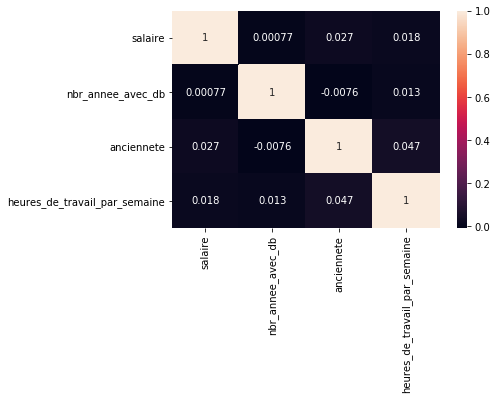

In [84]:
# Correlation matrix
sn.heatmap(df.drop("index_col",axis=1).corr(), annot=True)

## Outliers

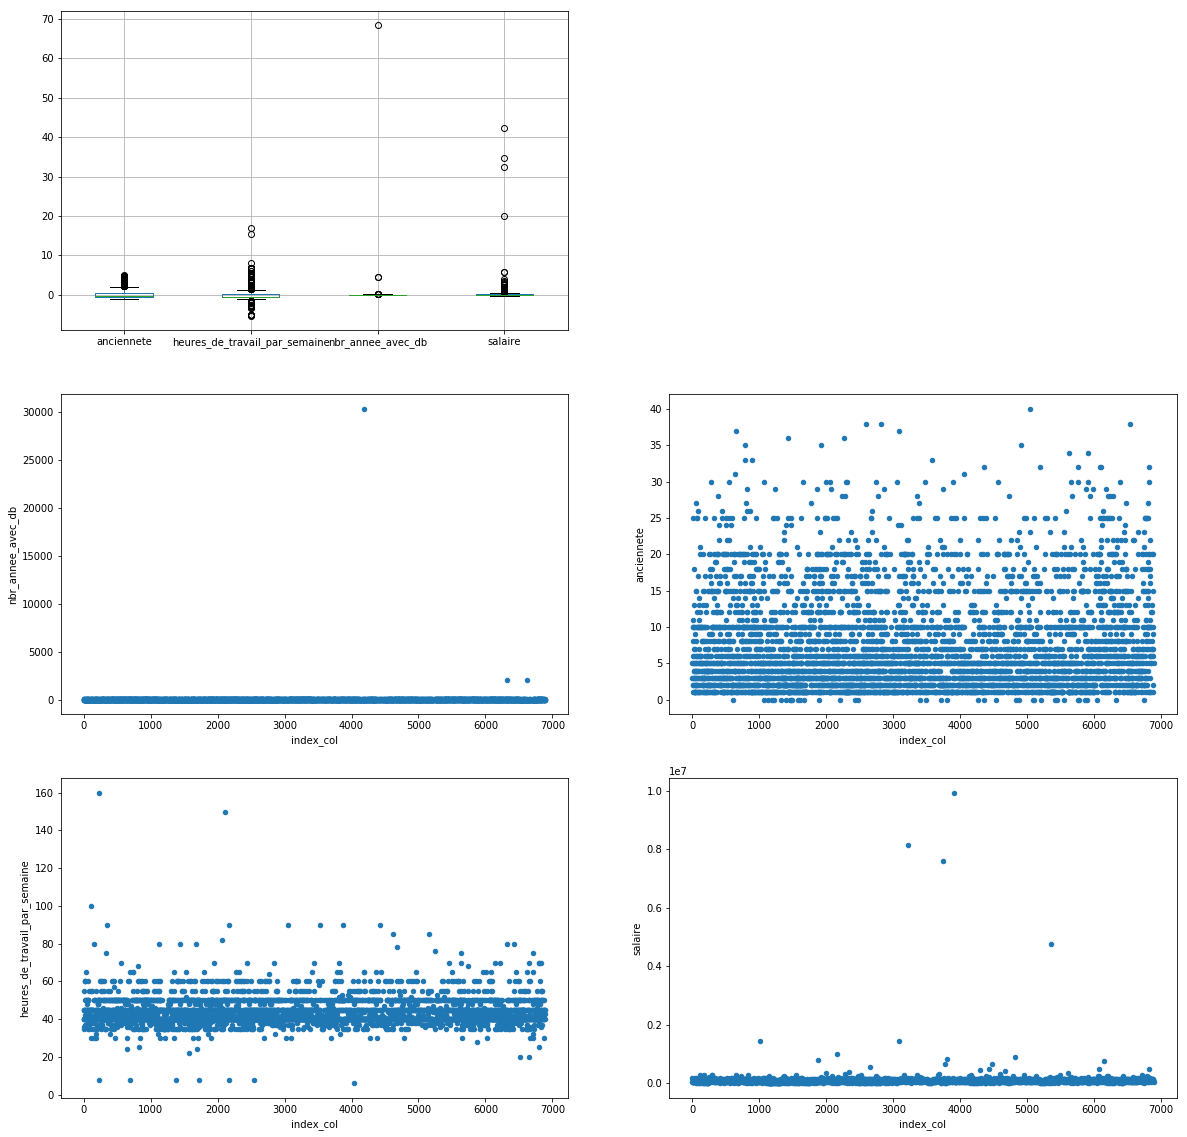

In [163]:
def show():
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(321)
    df_norm.boxplot(column=["anciennete","heures_de_travail_par_semaine","nbr_annee_avec_db","salaire"], ax=ax1)
   
    ax2 = fig.add_subplot(323)
    df.plot.scatter("index_col","nbr_annee_avec_db",ax=ax2)
    ax3 = fig.add_subplot(324)
    df.plot.scatter("index_col","anciennete", ax=ax3)
    ax4 = fig.add_subplot(325)
    df.plot.scatter("index_col","heures_de_travail_par_semaine", ax=ax4)
    ax5 = fig.add_subplot(326)
    df.plot.scatter("index_col","salaire", ax=ax5)
    
show()

### remove outliers

In [164]:
#  restrict salary between 500K and 10K
df = df.where( (df.salaire>10000)& (df.salaire<500000)).dropna()
# limited db expertise to 100y
df = df.where( (df.nbr_annee_avec_db<100)).dropna()
# limited to 10h per week
df = df.where( (df.heures_de_travail_par_semaine<100) & (df.heures_de_travail_par_semaine>10)).dropna()
df_norm = Norm()

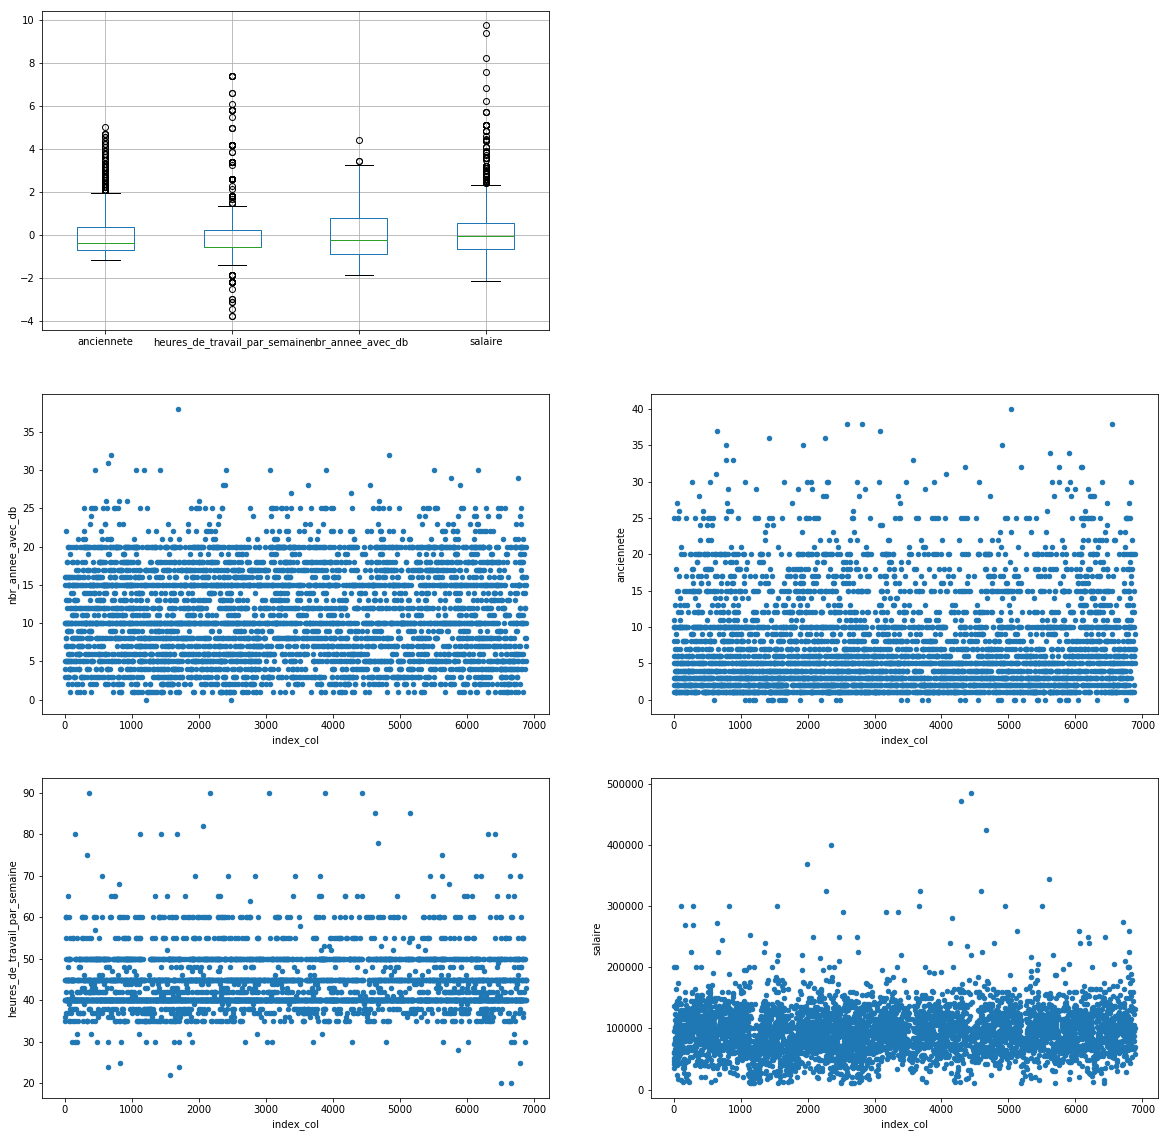

In [165]:
show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AA898A550>,
      dtype=object)

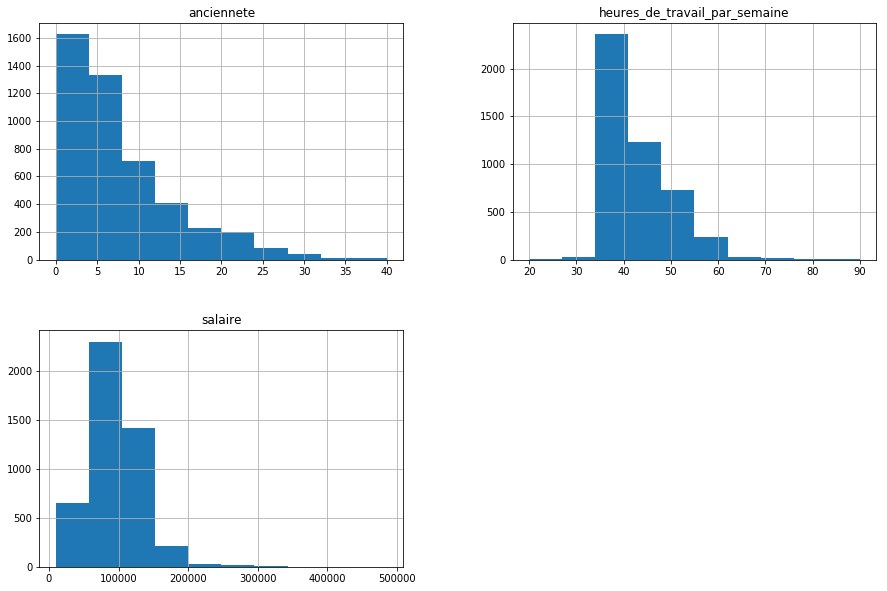

In [166]:
df[['anciennete',"heures_de_travail_par_semaine",'salaire']].hist(bins=10,figsize=(15,10)) 

# Hypothèses

## 1. Les datascientists sont bien payés ?

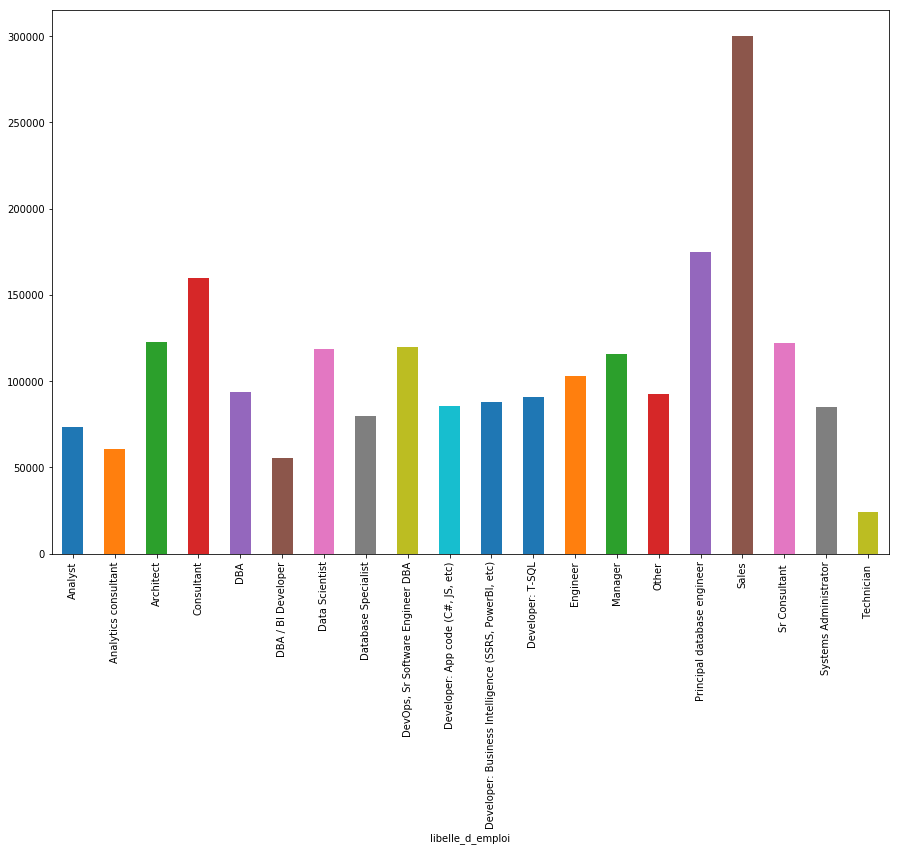

In [167]:
df.groupby(["libelle_d_emploi"]).mean()['salaire'].plot.bar(figsize=(15,10))

## 2.	Quel est le profil des personnes interrogés ?

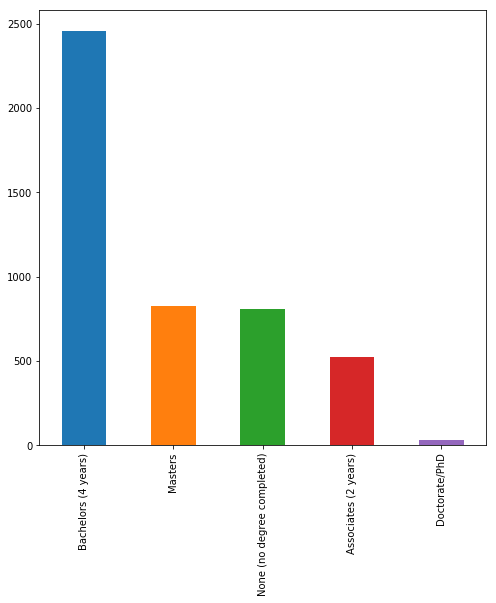

In [169]:
df["diplome"].value_counts().plot.bar(figsize=(8,8))

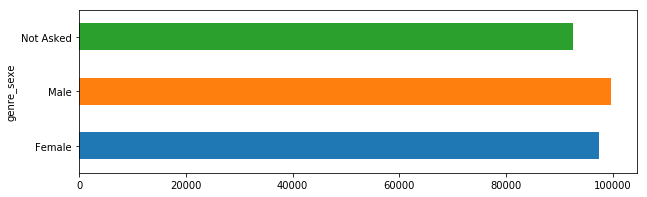

In [170]:
df.groupby(["genre_sexe"]).mean()['salaire'].plot.barh(figsize=(10,3))

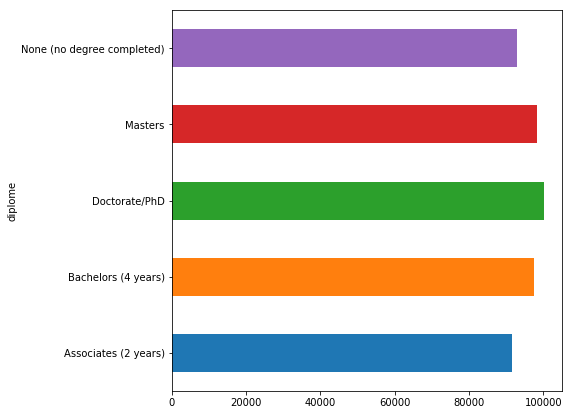

In [106]:
df.groupby(["diplome"]).mean()['salaire'].plot.barh(figsize=(7,7))

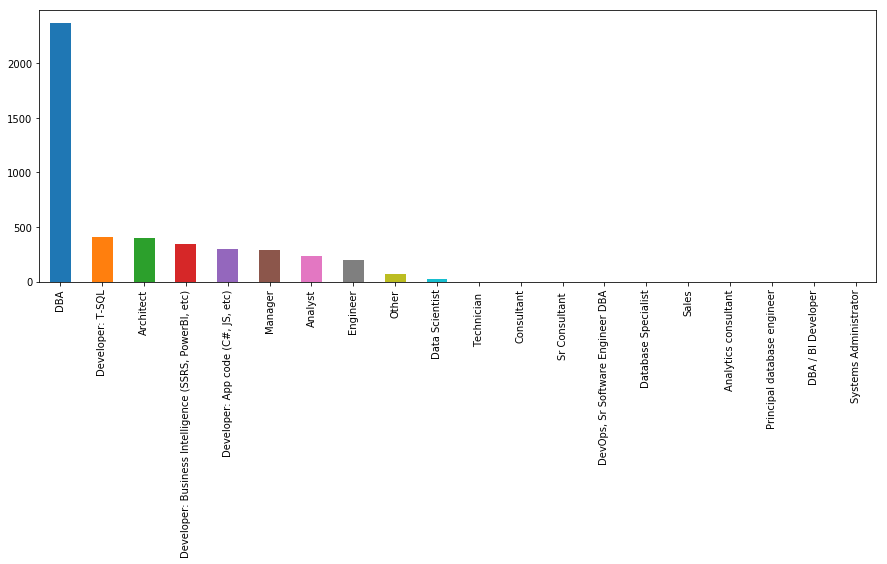

In [150]:
df.libelle_d_emploi.value_counts().plot.bar(figsize=(15,5))

## 3.	Peut-on construire une segmentation des métiers par classes ? (4 classes de salaire ) avec une description de chaque classe.

In [139]:
X = df[["salaire","anciennete","heures_de_travail_par_semaine","nbr_annee_avec_db"]]
Y = df[['libelle_d_emploi']]

### Kmeans 

In [140]:
# fitting model
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [141]:
i = 0
print(f"Persone poste :{df.libelle_d_emploi[i]} \n Cluster :{model.labels_[i]}")

Persone poste :DBA 
 Cluster :1


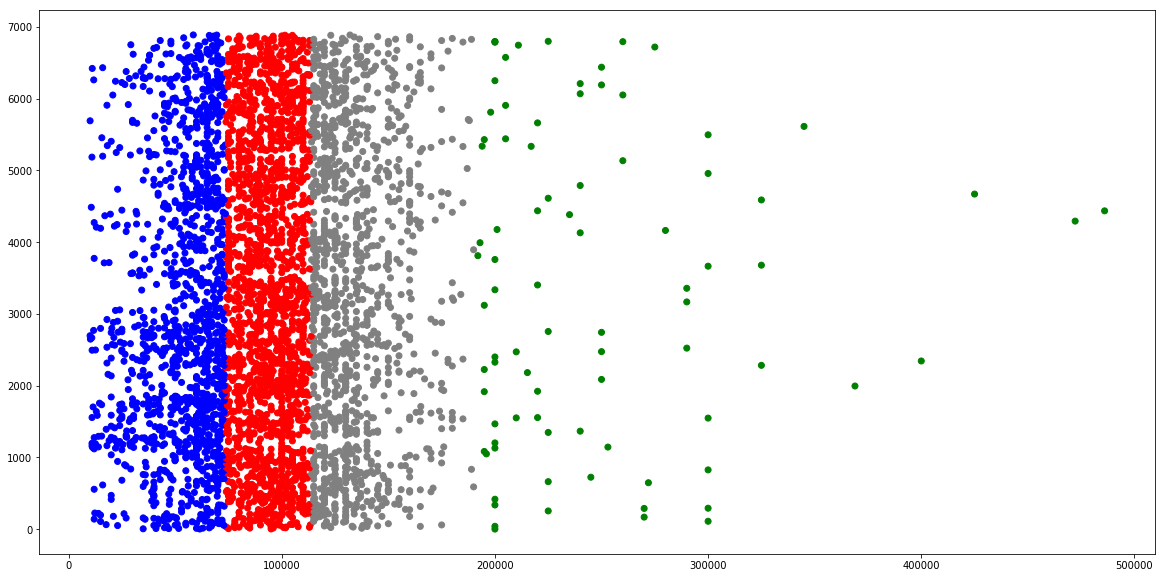

In [142]:
# plotting clusters
colormap=np.array(['Red','green','blue','grey'])
plt.figure(figsize=(20,10))
plt.scatter(X.salaire,X.index,c=colormap[model.labels_])

In [122]:
X['Poste'] = df.libelle_d_emploi
X['cluster'] = model.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [123]:
X

,salaire,anciennete,heures_de_travail_par_semaine,nbr_annee_avec_db,Poste,cluster
0,200000.0,5.0,45.0,10.0,DBA,3
1,61515.0,3.0,35.0,15.0,DBA,0
2,95000.0,25.0,45.0,5.0,Other,2
4,35000.0,10.0,40.0,10.0,DBA,0
6,75000.0,11.0,40.0,16.0,DBA,0
7,47000.0,1.0,36.0,4.0,DBA,0
8,41000.0,2.0,40.0,3.0,"Developer: App code (C#, JS, etc)",0
9,51652.0,10.0,45.0,8.0,Engineer,0
11,60000.0,8.0,40.0,22.0,"Developer: Business Intelligence (SSRS, PowerB...",0
12,137500.0,6.0,55.0,16.0,DBA,1


In [143]:
#Profile de chaque Cluster
centroids = pd.DataFrame(model.cluster_centers_, columns=X.columns)
centroids['cluster'] = centroids.index
centroids

,salaire,anciennete,heures_de_travail_par_semaine,nbr_annee_avec_db,cluster
0,93947.826065,7.347363,43.636410,11.218053,0
1,247639.317647,9.447059,48.258824,15.070588,1
2,53532.269375,5.815651,41.787810,8.104590,2
3,133920.349684,9.012658,45.143987,14.395570,3


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


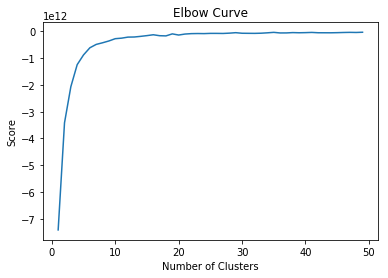

In [126]:
X.drop(['cluster','Poste'],axis=1,inplace=True)
# finding best K
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X).score(X) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

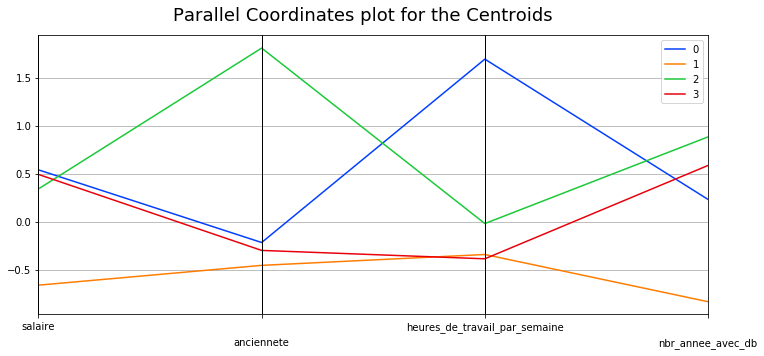

In [128]:
x = df_norm[["salaire","anciennete","heures_de_travail_par_semaine","nbr_annee_avec_db"]]
km = KMeans(n_clusters=4)
km.fit(x)

palette = sn.color_palette("bright", 10)

def display_parallel_coordinates_centroids(df, num_clusters):
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)
    parallel_coordinates(df, 'cluster', color=palette)
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)
        
centroids = pd.DataFrame(km.cluster_centers_, columns=x.columns)
centroids['cluster'] = centroids.index
display_parallel_coordinates_centroids(centroids, 10)

### PCA + Kmeans

In [130]:
# X.drop(['cluster','Poste'],axis=1,inplace=True)

pca = PCA(n_components=2)
pca = pca.fit_transform(X)
pca = pd.DataFrame(data=pca, columns=["pc1","pc2"])

In [131]:
# fitting model
model = KMeans(n_clusters=4)
model.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

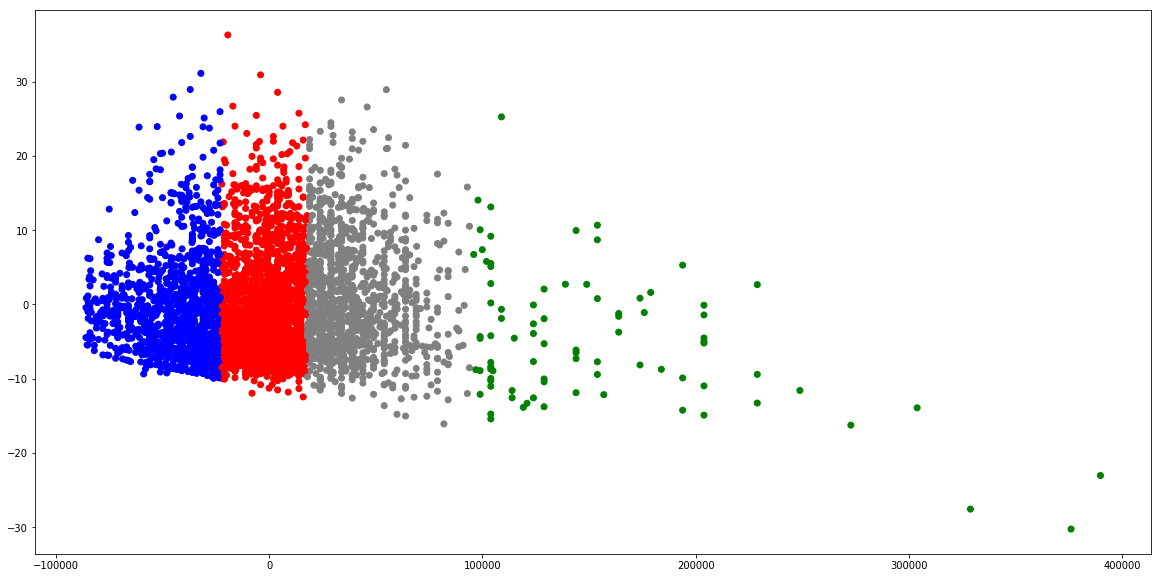

In [132]:
# plotting clusters
colormap=np.array(['Red','green','blue','grey'])
plt.figure(figsize=(20,10))
plt.scatter(pca.pc1,pca.pc2,c=colormap[model.labels_])

## 4.	Bonus : peut-on prédire  le métier de l’avenir avec ces données ?